In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digikala_data = pd.read_csv('digikala-orders.csv')
digikala_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [5]:
digikala_data['DateTime_CartFinalize'] = pd.to_datetime(digikala_data['DateTime_CartFinalize'])
digikala_data['YearMonth'] = digikala_data['DateTime_CartFinalize'].map(lambda date: 100 * date.year + date.month)
digikala_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [6]:
result = digikala_data.groupby(['YearMonth'])['ID_Order'].count().reset_index()
result.head()

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


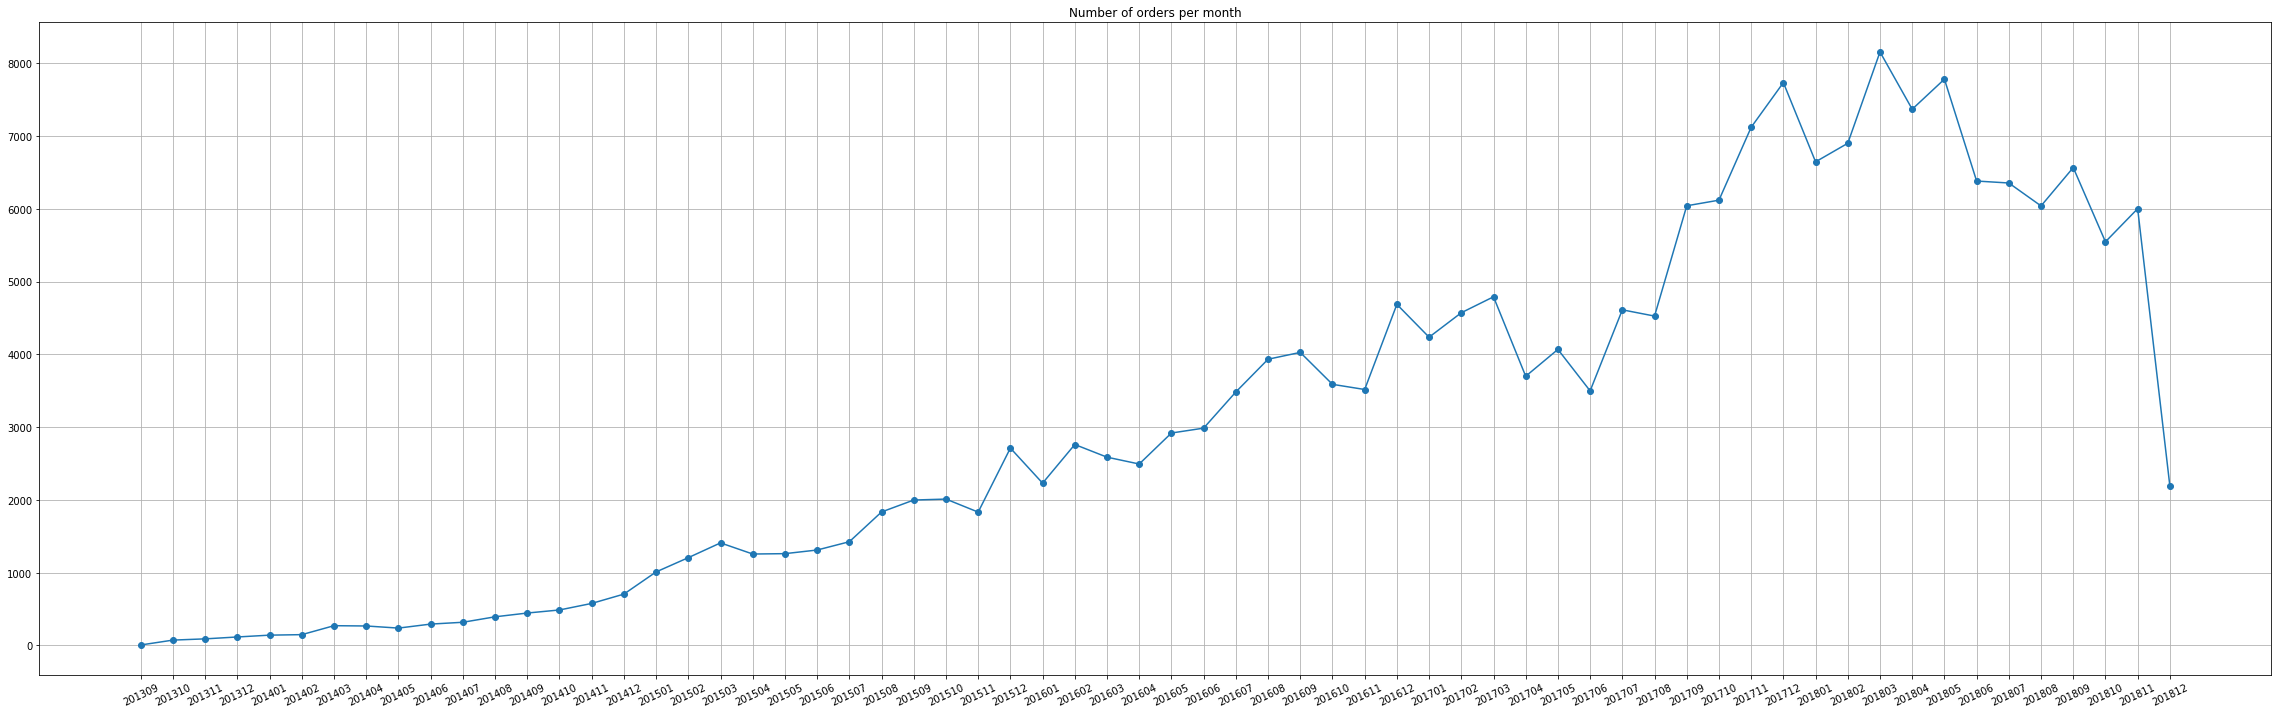

In [11]:
plt.figure(figsize=(40, 12))

plt.plot(result['YearMonth'].to_numpy(dtype=str), result['ID_Order'], marker='o')

plt.grid()
plt.xticks(rotation=25)

plt.title('Number of orders per month')
plt.show()